In [1]:
#import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 6\Lesson 6-Supervised Learning-Classification')

In [2]:
df=pd.read_csv('College.csv')

In [3]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
x=df.drop('Private',axis=1)
y=df['Private']

In [9]:
#applying the label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

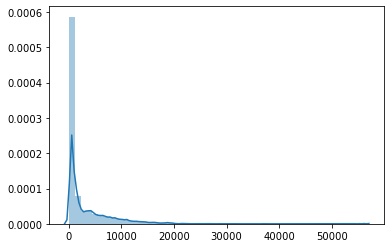

In [10]:
#seperate outliers of features variable apply standar scaler funtion
sns.distplot(x)

In [11]:
#standarized the feature data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [15]:
#model selection 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((543, 17), (543,), (234, 17), (234,))

In [18]:
#fit support vector machine algorthim model for training datasets
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred=svm.predict(x_test)

In [22]:
#find the accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('\n accuracy score is',accuracy_score(y_test,y_pred))
print('\n Confussion matrix is',confusion_matrix(y_test,y_pred))
print('\n Classification report is',classification_report(y_test,y_pred))


 accuracy score is 0.9273504273504274

 Confussion matrix is [[ 52  12]
 [  5 165]]

 Classification report is               precision    recall  f1-score   support

           0       0.91      0.81      0.86        64
           1       0.93      0.97      0.95       170

    accuracy                           0.93       234
   macro avg       0.92      0.89      0.91       234
weighted avg       0.93      0.93      0.93       234



In [24]:
#using grindcv model selection
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(SVC(),param_grid,verbose=2,refit=True)

In [23]:
param_grid={'C':[1.0,0.1,0.01,0.001],'gamma':[0.1,1.0,0.001,0.01]}

In [25]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................................. C=1.0, gamma=0.1, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................................. C=1.0, gamma=0.1, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................................. C=1.0, gamma=0.1, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................................. C=1.0, gamma=0.1, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ................................. C=1.0, gamma=0.1, total=   0.0s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ................................. C=1.0, gamma=1.0, total=   0.0s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=1.0, total=   0.0s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=   0.0s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=   0.0s
[CV] C=0.1, gamma=1.0 ................................................
[CV] ................................. C=0.1, gamma=1.0, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'gamma': [0.1, 1.0, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
gs_y_pred=gs.predict(x_test)

In [27]:
#find the accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('\n accuracy score is',accuracy_score(y_test,gs_y_pred))
print('\n Confussion matrix is',confusion_matrix(y_test,gs_y_pred))
print('\n Classification report is',classification_report(y_test,gs_y_pred))


 accuracy score is 0.9188034188034188

 Confussion matrix is [[ 50  14]
 [  5 165]]

 Classification report is               precision    recall  f1-score   support

           0       0.91      0.78      0.84        64
           1       0.92      0.97      0.95       170

    accuracy                           0.92       234
   macro avg       0.92      0.88      0.89       234
weighted avg       0.92      0.92      0.92       234



In [32]:
(14+5)/(5+165+50+14)

0.0811965811965812

In [31]:
(165+50)/(5+165+50+14)

0.9188034188034188

#conclusion
train_test_model accuracy > gridserach model accuracy
train_test_model is best fitting model selection for svm